In [1]:
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [2]:
############################################
# prepare database file to be connected    #
############################################
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
#from sqlalchemy import extract <--- I PUT THIS WHERE IT BELONGS!!!

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
print(results)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [5]:
#  3. Convert the June temperatures to a list.
temps = list(np.ravel(results))
print(temps)

[78.0, 76.0, 78.0, 76.0, 77.0, 78.0, 77.0, 78.0, 78.0, 79.0, 78.0, 78.0, 78.0, 77.0, 78.0, 78.0, 77.0, 77.0, 82.0, 78.0, 78.0, 78.0, 78.0, 78.0, 77.0, 76.0, 78.0, 78.0, 78.0, 78.0, 77.0, 78.0, 73.0, 70.0, 76.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 77.0, 78.0, 78.0, 77.0, 78.0, 78.0, 75.0, 76.0, 76.0, 77.0, 78.0, 76.0, 77.0, 75.0, 77.0, 76.0, 76.0, 75.0, 77.0, 77.0, 76.0, 78.0, 77.0, 76.0, 77.0, 76.0, 76.0, 77.0, 77.0, 78.0, 77.0, 77.0, 77.0, 76.0, 75.0, 76.0, 76.0, 77.0, 76.0, 73.0, 73.0, 75.0, 77.0, 76.0, 77.0, 79.0, 78.0, 79.0, 78.0, 78.0, 79.0, 77.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 76.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 76.0, 77.0, 75.0, 76.0, 74.0, 75.0, 77.0, 76.0, 77.0, 78.0, 79.0, 77.0, 78.0, 79.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 82.0, 80.0, 79.0, 79.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 75.0, 75.0, 76.0, 84.0, 79.0, 76.0, 79.0, 79.0, 77.0, 79.0, 78.0, 78.0, 79.0, 77.0, 79.0, 78.0, 78.0, 78.0, 79.0, 77.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 77.0, 78.0, 78.0, 78.0, 79.

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
temp_df = pd.DataFrame(temps, columns=['June Temperatures'])
print(temp_df)

      June Temperatures
0                  78.0
1                  76.0
2                  78.0
3                  76.0
4                  77.0
...                 ...
1695               79.0
1696               74.0
1697               74.0
1698               76.0
1699               75.0

[1700 rows x 1 columns]


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temp_df.describe()

,June Temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
print(results)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [9]:
# 7. Convert the December temperatures to a list.
temps = list(np.ravel(results))
print(temps)

[76.0, 74.0, 74.0, 64.0, 64.0, 67.0, 77.0, 66.0, 69.0, 68.0, 68.0, 71.0, 74.0, 67.0, 66.0, 69.0, 71.0, 70.0, 70.0, 74.0, 74.0, 71.0, 75.0, 75.0, 72.0, 69.0, 68.0, 73.0, 74.0, 73.0, 73.0, 73.0, 73.0, 71.0, 73.0, 73.0, 77.0, 72.0, 71.0, 73.0, 70.0, 73.0, 69.0, 74.0, 72.0, 71.0, 72.0, 72.0, 70.0, 73.0, 73.0, 72.0, 73.0, 73.0, 72.0, 63.0, 65.0, 71.0, 76.0, 70.0, 76.0, 69.0, 69.0, 69.0, 74.0, 76.0, 74.0, 73.0, 73.0, 74.0, 73.0, 73.0, 73.0, 74.0, 74.0, 71.0, 73.0, 72.0, 64.0, 66.0, 73.0, 72.0, 65.0, 64.0, 69.0, 68.0, 77.0, 71.0, 71.0, 69.0, 68.0, 68.0, 69.0, 70.0, 72.0, 76.0, 75.0, 69.0, 71.0, 71.0, 71.0, 68.0, 65.0, 70.0, 69.0, 69.0, 71.0, 67.0, 73.0, 74.0, 73.0, 67.0, 74.0, 75.0, 75.0, 74.0, 67.0, 73.0, 73.0, 71.0, 72.0, 71.0, 68.0, 65.0, 69.0, 70.0, 70.0, 74.0, 71.0, 74.0, 73.0, 72.0, 74.0, 72.0, 74.0, 75.0, 74.0, 70.0, 74.0, 70.0, 66.0, 61.0, 63.0, 63.0, 63.0, 63.0, 67.0, 56.0, 75.0, 77.0, 75.0, 75.0, 75.0, 75.0, 71.0, 70.0, 74.0, 74.0, 75.0, 72.0, 70.0, 66.0, 74.0, 75.0, 74.0, 75.0, 76.

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
temp_df = pd.DataFrame(temps, columns=['December Temperatures'])
print(temp_df)

      December Temperatures
0                      76.0
1                      74.0
2                      74.0
3                      64.0
4                      64.0
...                     ...
1512                   71.0
1513                   71.0
1514                   69.0
1515                   65.0
1516                   65.0

[1517 rows x 1 columns]


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
temp_df.describe()

,December Temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [50]:
# 10. Create query to see entire table. There is an SQLite Viewer at https://inloop.github.io/sqlite-viewer/
# I like to evaluate all my data to see if it could be useful to answer questions, like, is there a pattern in the weather?
results = session.query(Measurement.date, Measurement.tobs,Measurement.prcp,Measurement.station).filter(Measurement.date.between('2010-01-01','2017-08-23')).all()
print(results)

[('2010-01-01', 65.0, 0.08, 'USC00519397'), ('2010-01-02', 63.0, 0.0, 'USC00519397'), ('2010-01-03', 74.0, 0.0, 'USC00519397'), ('2010-01-04', 76.0, 0.0, 'USC00519397'), ('2010-01-06', 73.0, None, 'USC00519397'), ('2010-01-07', 70.0, 0.06, 'USC00519397'), ('2010-01-08', 64.0, 0.0, 'USC00519397'), ('2010-01-09', 68.0, 0.0, 'USC00519397'), ('2010-01-10', 73.0, 0.0, 'USC00519397'), ('2010-01-11', 64.0, 0.01, 'USC00519397'), ('2010-01-12', 61.0, 0.0, 'USC00519397'), ('2010-01-14', 66.0, 0.0, 'USC00519397'), ('2010-01-15', 65.0, 0.0, 'USC00519397'), ('2010-01-16', 68.0, 0.0, 'USC00519397'), ('2010-01-17', 64.0, 0.0, 'USC00519397'), ('2010-01-18', 72.0, 0.0, 'USC00519397'), ('2010-01-19', 66.0, 0.0, 'USC00519397'), ('2010-01-20', 66.0, 0.0, 'USC00519397'), ('2010-01-21', 69.0, 0.0, 'USC00519397'), ('2010-01-22', 67.0, 0.0, 'USC00519397'), ('2010-01-23', 67.0, 0.0, 'USC00519397'), ('2010-01-24', 71.0, 0.01, 'USC00519397'), ('2010-01-25', 67.0, 0.0, 'USC00519397'), ('2010-01-26', 76.0, 0.04, '

In [51]:
all_columns = list(np.ravel(results))
print(all_columns)

['2010-01-01', 65.0, 0.08, 'USC00519397', '2010-01-02', 63.0, 0.0, 'USC00519397', '2010-01-03', 74.0, 0.0, 'USC00519397', '2010-01-04', 76.0, 0.0, 'USC00519397', '2010-01-06', 73.0, None, 'USC00519397', '2010-01-07', 70.0, 0.06, 'USC00519397', '2010-01-08', 64.0, 0.0, 'USC00519397', '2010-01-09', 68.0, 0.0, 'USC00519397', '2010-01-10', 73.0, 0.0, 'USC00519397', '2010-01-11', 64.0, 0.01, 'USC00519397', '2010-01-12', 61.0, 0.0, 'USC00519397', '2010-01-14', 66.0, 0.0, 'USC00519397', '2010-01-15', 65.0, 0.0, 'USC00519397', '2010-01-16', 68.0, 0.0, 'USC00519397', '2010-01-17', 64.0, 0.0, 'USC00519397', '2010-01-18', 72.0, 0.0, 'USC00519397', '2010-01-19', 66.0, 0.0, 'USC00519397', '2010-01-20', 66.0, 0.0, 'USC00519397', '2010-01-21', 69.0, 0.0, 'USC00519397', '2010-01-22', 67.0, 0.0, 'USC00519397', '2010-01-23', 67.0, 0.0, 'USC00519397', '2010-01-24', 71.0, 0.01, 'USC00519397', '2010-01-25', 67.0, 0.0, 'USC00519397', '2010-01-26', 76.0, 0.04, 'USC00519397', '2010-01-27', 68.0, 0.12, 'USC005

In [52]:
df = pd.DataFrame(results, columns=['Date', 'Temperature','Precipitation','Station'])
print(df)

             Date  Temperature  Precipitation      Station
0      2010-01-01         65.0           0.08  USC00519397
1      2010-01-02         63.0           0.00  USC00519397
2      2010-01-03         74.0           0.00  USC00519397
3      2010-01-04         76.0           0.00  USC00519397
4      2010-01-06         73.0            NaN  USC00519397
...           ...          ...            ...          ...
19545  2017-08-19         71.0           0.09  USC00516128
19546  2017-08-20         78.0            NaN  USC00516128
19547  2017-08-21         76.0           0.56  USC00516128
19548  2017-08-22         76.0           0.50  USC00516128
19549  2017-08-23         76.0           0.45  USC00516128

[19550 rows x 4 columns]


In [53]:
df.set_index(df['Date'], inplace=True)

In [54]:
df = df.sort_index()

In [55]:
print(df.to_string(index=False))

      Date  Temperature  Precipitation     Station
2010-01-01         65.0           0.08 USC00519397
2010-01-01         72.0           0.21 USC00518838
2010-01-01         75.0           0.15 USC00519523
2010-01-01         70.0           0.15 USC00519281
2010-01-01         66.0           0.05 USC00511918
2010-01-01         73.0           0.14 USC00516128
2010-01-01         67.0           0.28 USC00513117
2010-01-02         62.0           0.00 USC00519281
2010-01-02         75.0           0.00 USC00519523
2010-01-02         65.0           0.00 USC00513117
2010-01-02         73.0           0.02 USC00518838
2010-01-02         63.0           0.00 USC00519397
2010-01-02         70.0           0.00 USC00511918
2010-01-02         61.0           0.00 USC00516128
2010-01-03         75.0           0.00 USC00511918
2010-01-03         76.0           0.00 USC00516128
2010-01-03         74.0           0.00 USC00519281
2010-01-03         77.0           0.00 USC00519523
2010-01-03         75.0        

<AxesSubplot:xlabel='Date'>

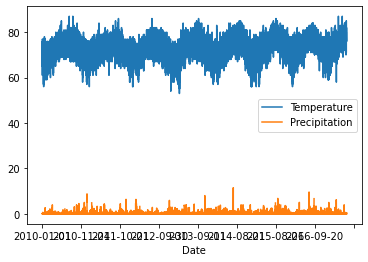

In [56]:
df.plot()

In [58]:
df.describe()

,Temperature,Precipitation
count,19550.000000,18103.000000
mean,73.097954,0.160644
std,4.523527,0.468746
min,53.000000,0.000000
25%,70.000000,0.000000
50%,73.000000,0.010000
75%,76.000000,0.110000
max,87.000000,11.530000


In [ ]:
#how many days has the temperature been under ?
# when 